### Домашнее задание

При фиксированном seed=21  поэкспериментируйте с параметрами алгоритма дифференциальной эволюции:
    strategy, popsize, tol, mutation, recombination и updating. 
    
для функции Растригина

Постройте графики количества итераций оптимизации функции Растригина от значения параметра. 

In [2]:
# Подгружаю библиотеки

import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
import math

In [34]:
# Определяю функцию:
def rastrigin(*X, A=10):
    return A + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in X])
    # return A + sum(x**2 - A * np.cos(2 * math.pi * x))




In [35]:
# Первоначальный расчет. Все значения по умолчанию
bounds = [(-5.12, 5.12)]
result = differential_evolution(rastrigin, bounds, seed=21)
result

     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 497
     nit: 32
 success: True
       x: array([-5.38788072e-10])

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

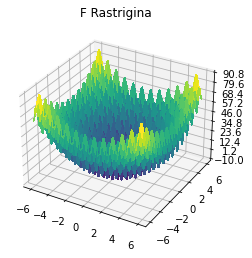

In [36]:
# Визуализирую функцию Растригина

fig = plt.figure()
ax = fig.gca(projection='3d')

x = np.arange(-6, 6, 0.025)
y = np.arange(-6, 6, 0.025)
X,Y = np.meshgrid(x,y)
Z = rastrigin(X, Y)

surf = ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, antialiased=False)

#ax.set_zlim(-550, 550)
ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

#fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title('F Rastrigina')

plt.show()

## Теперь поэкспериментирую с параметрами алгоритма дифференциальной эволюции

### Описание:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html

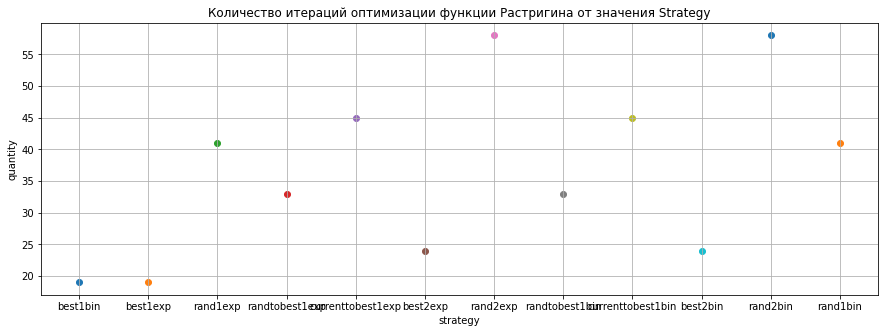

In [37]:
# 1. Параметр strategy

plt.figure(figsize=(15,5)) 
plt.xlabel('strategy')
plt.ylabel('quantity')
plt.title('Количество итераций оптимизации функции Растригина от значения Strategy')

strategy = ('best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 
            'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin')

for i in strategy:
    result = differential_evolution(rastrigin, bounds, popsize=15, mutation=(0.1, 1), recombination=1, 
                                    strategy=i, tol=0.3, updating='immediate', seed=21)
    plt.scatter(i, result.nit)
plt.grid()
plt.show()

Лучшие: best1bin и best1exp

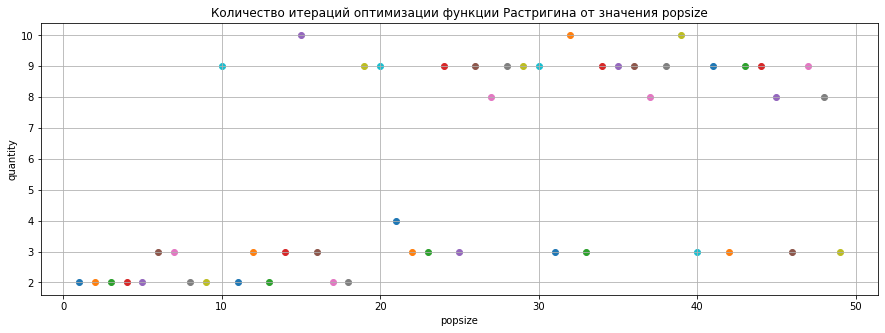

In [40]:
# 2. Параметр popsize

plt.figure(figsize=(15,5)) 
plt.xlabel('popsize')
plt.ylabel('quantity')
plt.title('Количество итераций оптимизации функции Растригина от значения popsize')

for i in range(1,50):
    result = differential_evolution(rastrigin, bounds, popsize=i, mutation=(0.1, 0.1), recombination=1, 
                                  strategy='best1bin', tol=0.3, updating='immediate', seed=21)
    plt.scatter(i, result.nit)
plt.grid()
plt.show()

Здесь уже поболе наилучших: при значениях от 1 до 5, 8,9, 11, 13, 17 и 18

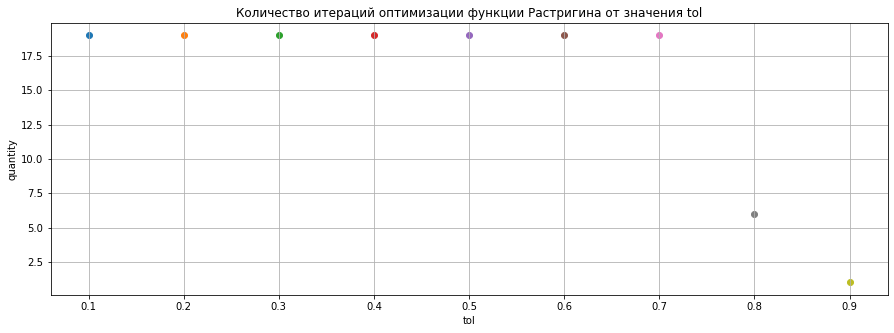

In [43]:
# 3. Параметр tol

plt.figure(figsize=(15,5)) 
plt.xlabel('tol')
plt.ylabel('quantity')
plt.title('Количество итераций оптимизации функции Растригина от значения tol')

for i in range(1, 10, 1):
    result = differential_evolution(rastrigin, bounds, popsize=15, mutation=(0.1, 1), recombination=1, 
                                    strategy='best1bin', tol=(i/10), updating='immediate', seed=21)
    plt.scatter(i/10, result.nit)
plt.grid()
plt.show()

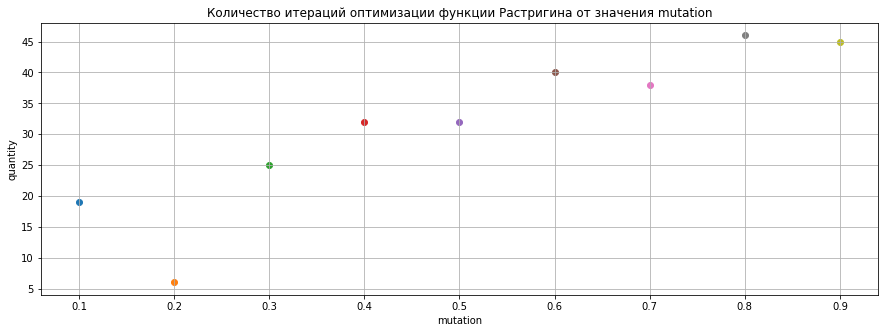

In [44]:
# 4. Параметр mutation

plt.figure(figsize=(15,5)) 
plt.xlabel('mutation')
plt.ylabel('quantity')
plt.title('Количество итераций оптимизации функции Растригина от значения mutation')

for i in range(1, 10, 1):
    result = differential_evolution(rastrigin, bounds, popsize=15, mutation=(i/10, 1), recombination=1, 
                                    strategy='best1bin', tol=0.3, updating='immediate', seed=21)
    plt.scatter(i/10, result.nit)
plt.grid()
plt.show()

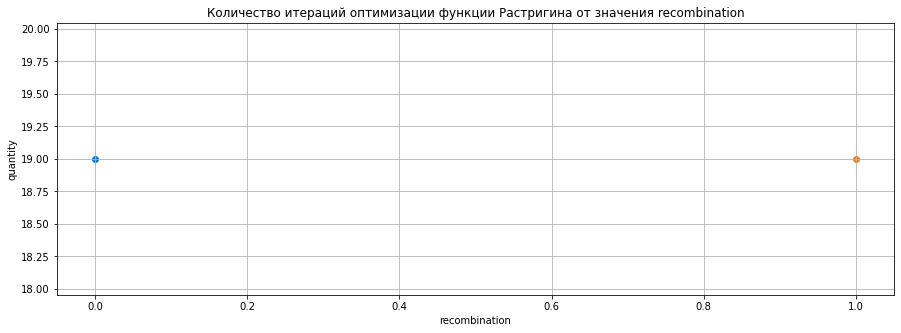

In [47]:
# 5. Параметр recombination

plt.figure(figsize=(15,5)) 
plt.xlabel('recombination')
plt.ylabel('quantity')
plt.title('Количество итераций оптимизации функции Растригина от значения recombination')

for i in range(0, 2):
    result = differential_evolution(rastrigin, bounds, popsize=15, mutation=(0.1, 1), recombination=i, 
                                    strategy='best1bin', tol=0.3, updating='immediate', seed=21)
    plt.scatter(i, result.nit)
plt.grid()
plt.show()

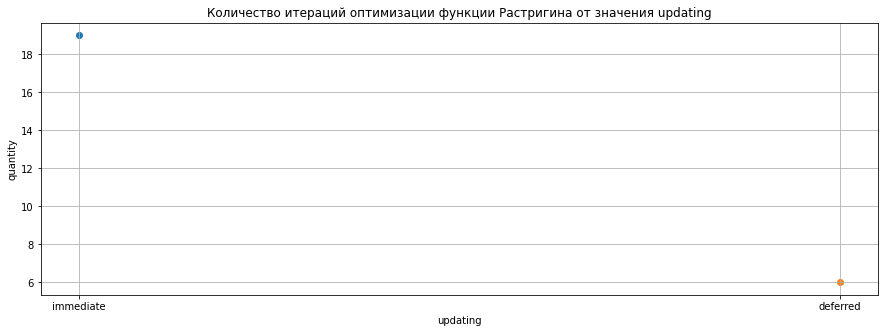

In [48]:
# 6. Параметр updating

plt.figure(figsize=(15,5)) 
plt.xlabel('updating')
plt.ylabel('quantity')
plt.title('Количество итераций оптимизации функции Растригина от значения updating')

updating = ('immediate', 'deferred')
for i in updating:
    result = differential_evolution(rastrigin, bounds, popsize=15, mutation=(0.1, 1), recombination=1, 
                                  strategy='best1bin', tol=0.3, updating=i, seed=21)
    plt.scatter(i, result.nit)
plt.grid()
plt.show()